# **Data Science | Remote Internship | Oasis InfoByte**
## **Task 05: Sales Prediction using Python:**

 - `Sales prediction` means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are `advertising` on about your `product`.
 - Typically, a product and service – based business always need their `Data Scientist` to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the `task` of `Sales Prediction` with `Machine Learning` using `Python`.

 ---


## **Step No# 01: Import Libraries:**
  - `Import Libraries:` Necessary libraries are imported, including `NumPy`, `Pandas`, `Matplotlib`, `Seaborn`, and `Scikit-Learn`.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

 - #### **Hide warnings**

In [2]:
# Hide warnings
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [12, 6]
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

---

## **Step 2: Load the Dataset:**
 - `Load the Dataset:` The `Advertising dataset` is `loaded` into a `Pandas DataFrame`.

In [3]:
df = pd.read_csv("Advertising.csv")

---

## **Step 3: Data Exploration:**
 - **`Data Exploration:`** `Basic information` about the `dataset`, the first few rows, and `summary statistics` are displayed.

 - #### **`Display` the `first few rows` of the `dataset`:**

In [4]:
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


 - #### **Drop the `Unnamed: 0` column:**

In [5]:
# Drop the Unnamed: 0 column
# Check if 'Unnamed: 0' is in the column
if 'Unnamed: 0' in df.columns:
    # Drop the 'Unnamed: 0' column
    df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
else:
    print("Column 'Unnamed: 0' not found in DataFrame.")

 - #### **`Display` the `first few rows` of the `dataset` with `drop` `Unnamed: 0` column:**

In [6]:
# Display the first few rows of the dataset
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


 - #### **`Display Basic Information` about the `dataset:`**

In [7]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


- ##### **`Set Options` to be `Maximum` for `Rows` and `Columns:`**

In [8]:
# set options to be maximum for rows and columns.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

 - #### **`Summarize` - Summary Statistics:**

In [9]:
# Summarize (Summary Statistics)
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


---

## **Step 4: Data Pre-processing:**
 - **`Data Pre-processing:`** Checked for `missing values (none found).` If there were any `missing values`, `imputation` or `removal` could be performed at this step.

 - #### **Check for missing values:**

In [10]:
# Check for missing values
print("Missing values before handling:\n")
print(df.isnull().sum())

Missing values before handling:

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


 - #### **`No missing values`, so `no imputation` is `needed`.**

---

## **Step 5: Feature Engineering:**
 - **`Feature Engineering:`** Created a `new feature`, `Total_Ad_Expenses`, by `summing up TV, Radio,` and `Newspaper` ad expenses.

 - #### **Create a new feature: Total Ad Expenses:**

In [11]:
# Create a new feature: Total Ad Expenses
df['Total_Ad_Expenses'] = df['TV'] + df['Radio'] + df['Newspaper']

In [12]:
df.head()

,TV,Radio,Newspaper,Sales,Total_Ad_Expenses
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


---

## **Step 6: Data Visualization:**
 - Various `visualizations` are created, including `heatmap`, `box charts`, `pair plots`, `histograms`, `scatter plots`, `pie charts`, & `bubble charts`.

 - #### **`Check` for `Missing Values` with help of `Heatmap:`**

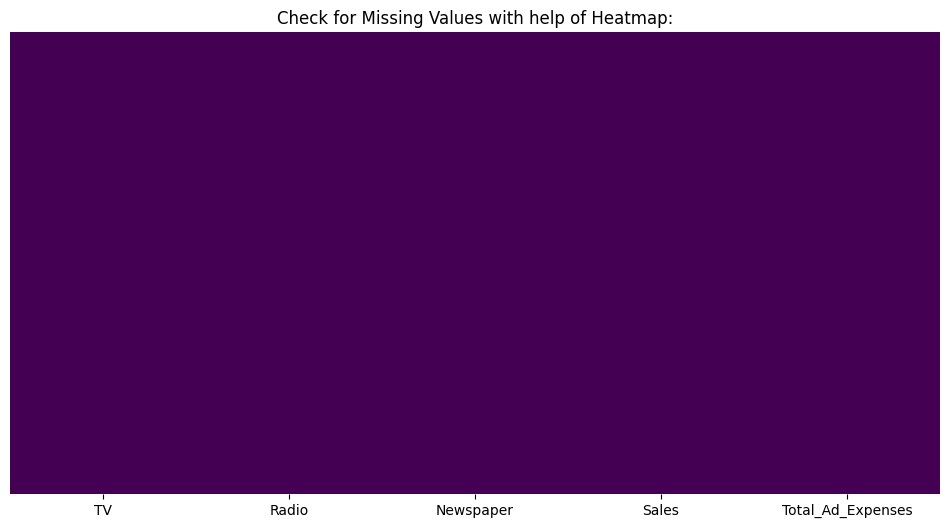

In [13]:
# Check for missing values with help of `Heatmap:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.title("Check for Missing Values with help of Heatmap:")
plt.show()

 - #### **`Heatmap` of All `Features` in DataSet:**

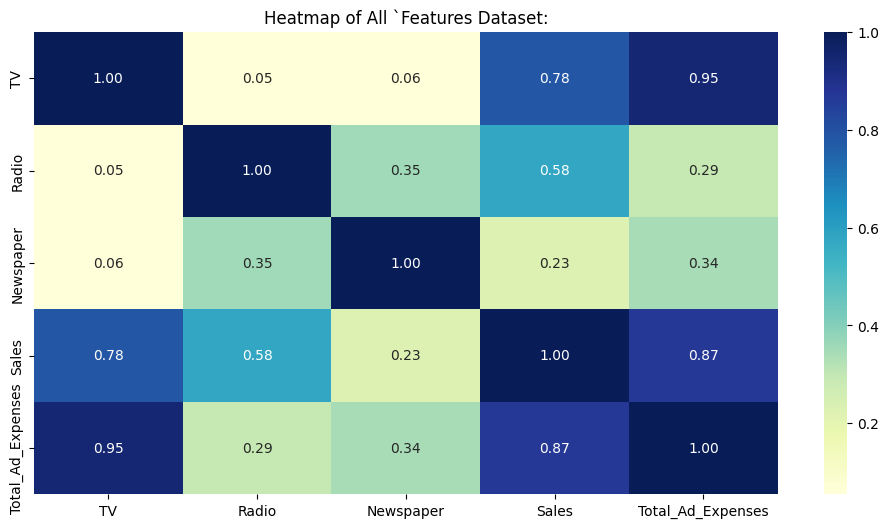

In [14]:
# `Heatmap` of All `Features` in DataSet:
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.title("Heatmap of All `Features Dataset:")
plt.show()

 - #### **Box chart for `Sales`:**

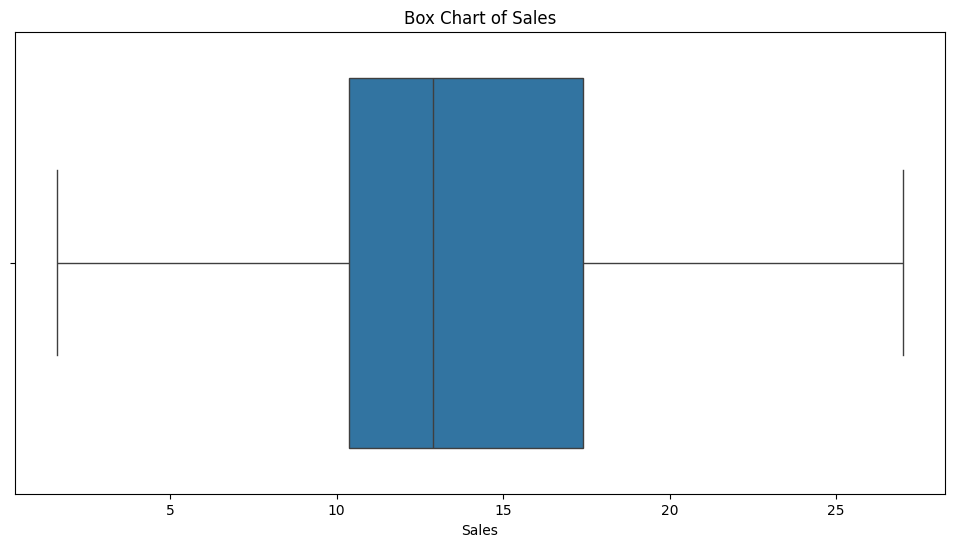

In [15]:
# Box chart for Sales
sns.boxplot(x='Sales', data=df)
plt.title('Box Chart of Sales')
plt.show()

 - #### **Pair Plot of Features:**

Pair Plot of Features:



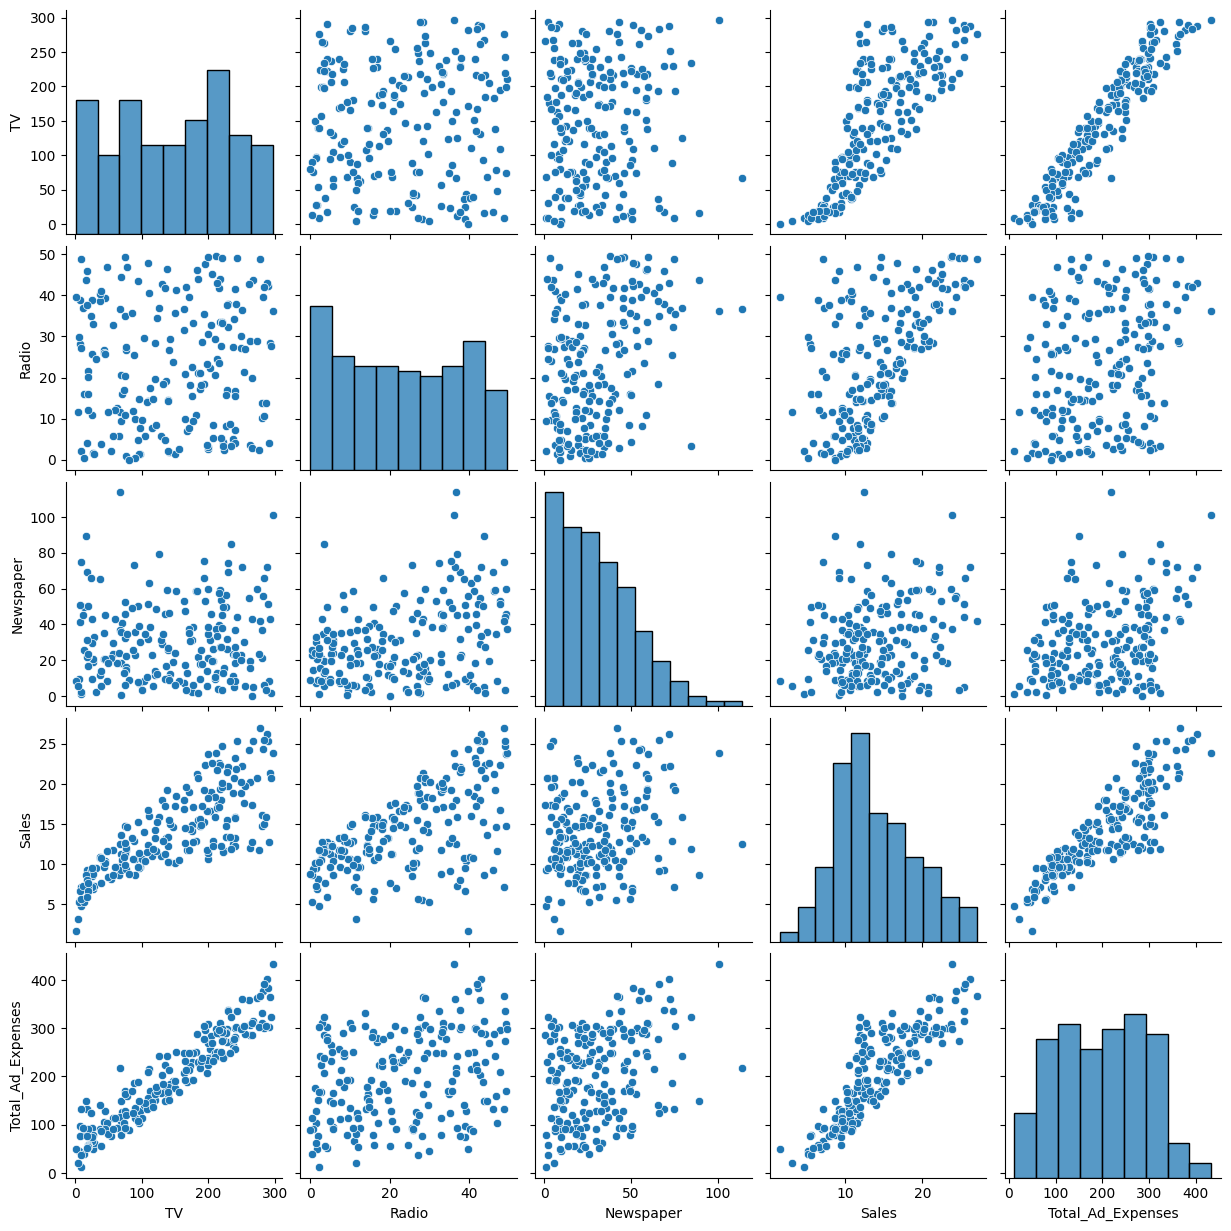

In [16]:
# Multiple charts (Pair plot)
print('Pair Plot of Features:\n')

sns.pairplot(df)
plt.show()

 - #### **Histogram for `Sales:`**

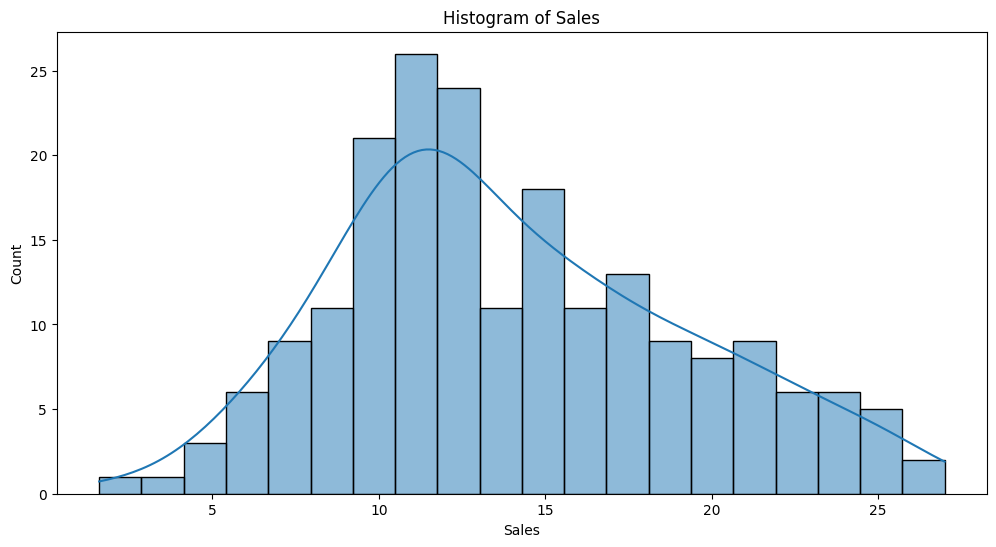

In [17]:
# Histogram for Sales
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title('Histogram of Sales')
plt.show()

 - #### **Scatter plot for `TV` vs `Sales:`**

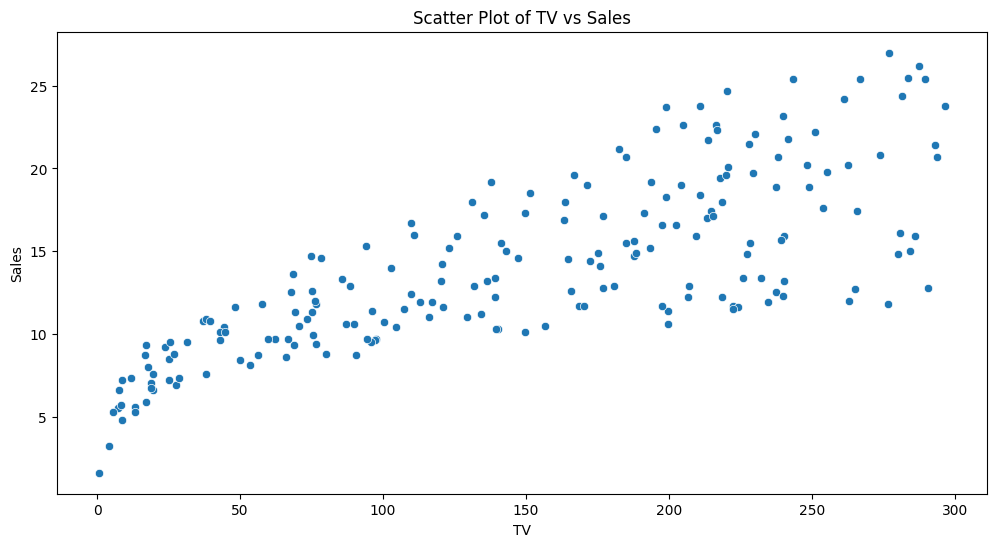

In [18]:
# Scatter plot for TV vs Sales
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('Scatter Plot of TV vs Sales')
plt.show()

 - #### **`Sales Category` column in dataset with fewer unique values**

In [19]:
# 'Sales_Category' column in dataset with fewer unique values
bins=[0, 5, 10, 15, 20, 25]
labels=['Very low', 'Low', 'Moderate', 'High', 'Very High']
df['Sales_Category'] = pd.cut(df['Sales'], bins = bins, labels = labels)

 - #### **Bar chart for `Radio` distribution:**

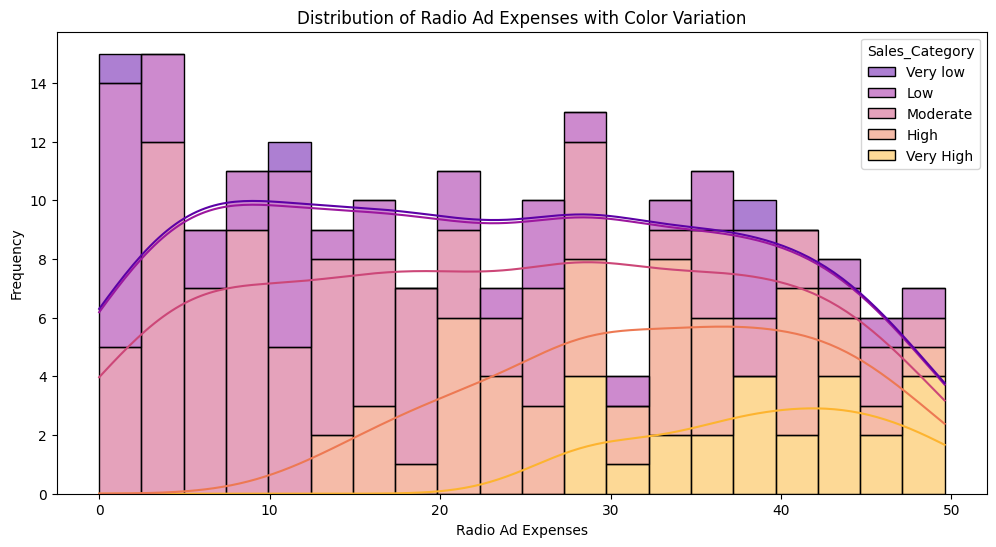

In [20]:
# Bar chart for Radio distribution with grouped categories
sns.histplot(df, x='Radio', bins=20, kde=True, hue='Sales_Category', multiple="stack", palette="plasma")
plt.title('Distribution of Radio Ad Expenses with Color Variation')
plt.xlabel('Radio Ad Expenses')
plt.ylabel('Frequency')
plt.show()

 - #### **`Bubble` chart - `Sales` vs `TV` and `Radio:`**

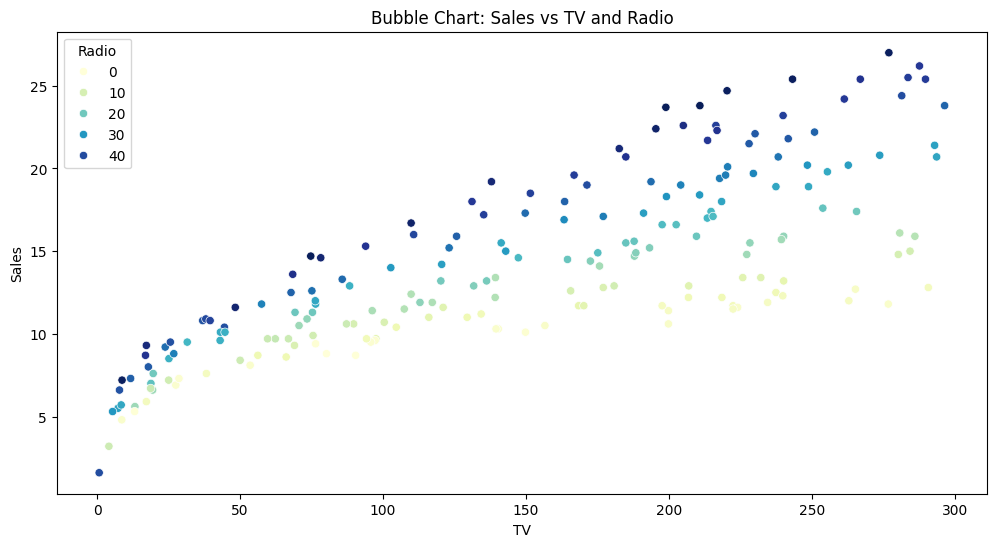

In [21]:
# Bubble chart - Sales vs TV and Radio
sns.scatterplot(x='TV', y='Sales', data=df, hue="Radio", palette="YlGnBu")
plt.title('Bubble Chart: Sales vs TV and Radio')
plt.show()

 - #### **Scatter plot for `Total Ad Expenses` vs `Sales` with `Newspaper:`**

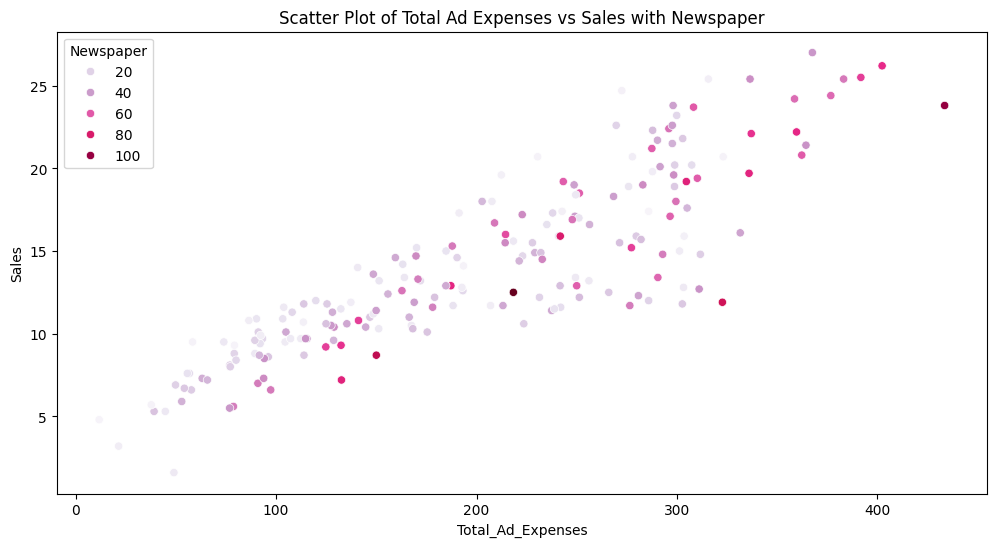

In [22]:
# Scatter plot for Total Ad Expenses vs Sales with Newspaper
sns.scatterplot(x='Total_Ad_Expenses', y='Sales', hue='Newspaper', data=df, palette="PuRd")
plt.title('Scatter Plot of Total Ad Expenses vs Sales with Newspaper')
plt.show()

 - #### **Scatter plot for `TV` vs `Sales` with `Newspaper:`**

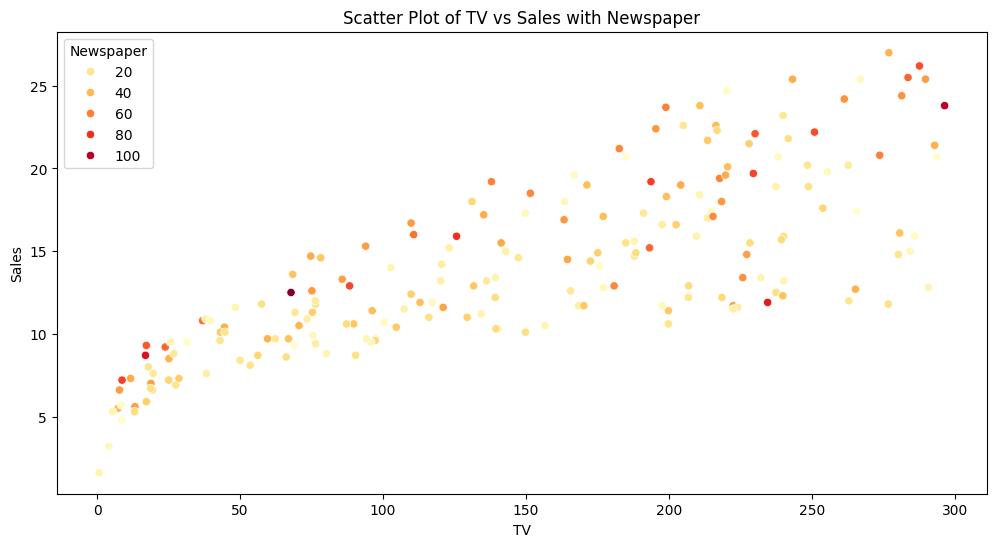

In [23]:
# Scatter plot for TV vs Sales with Newspaper
sns.scatterplot(x='TV', y='Sales', hue='Newspaper', data=df, palette = "YlOrRd")
plt.title('Scatter Plot of TV vs Sales with Newspaper')
plt.show()

 - #### **Scatter plot for `Radio` vs `Sales` with `Newspaper:`**

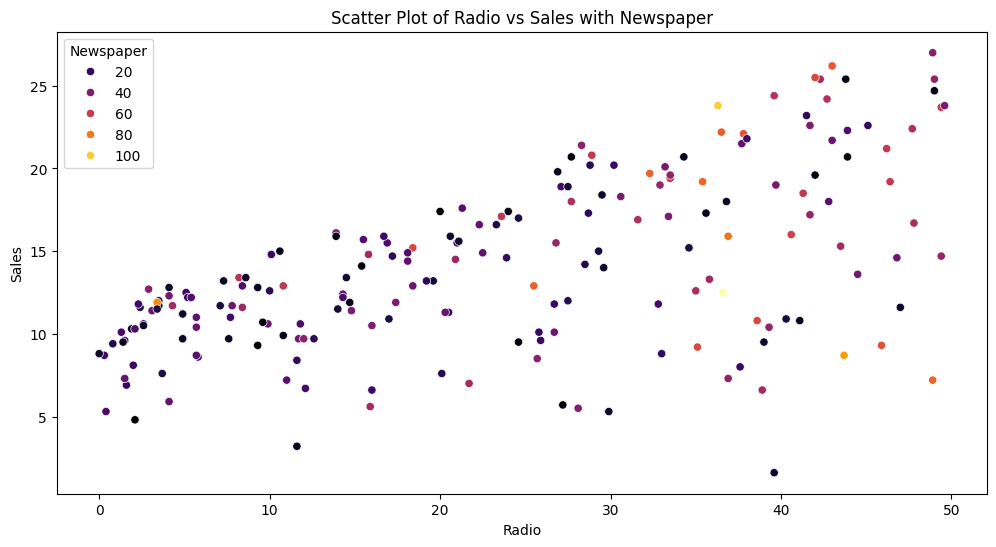

In [24]:
# Scatter plot for Radio vs Sales with Newspaper
sns.scatterplot(x='Radio', y='Sales', hue='Newspaper', data=df, palette= "inferno")
plt.title('Scatter Plot of Radio vs Sales with Newspaper')
plt.show()

- #### **Pie chart for `TV Ad Expenses` Distribution with `Total Ad Expenses:`**

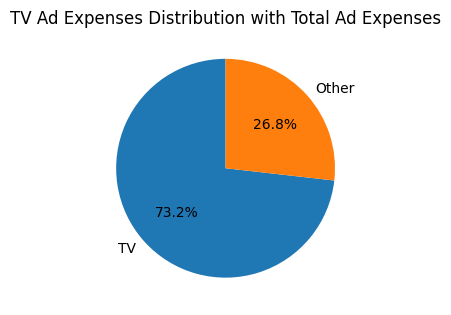

In [25]:
# Pie chart for TV Ad Expenses Distribution with Total Ad Expenses
plt.subplot(1, 3, 1)
tv_distribution = df['TV'].sum() / df['Total_Ad_Expenses'].sum()
plt.pie([tv_distribution, 1 - tv_distribution], labels=['TV', 'Other'], autopct='%1.1f%%', startangle=90)
plt.title('TV Ad Expenses Distribution with Total Ad Expenses')
plt.show()


 - #### **Pie chart for `Radio Ad Expenses` Distribution with `Total Ad Expenses:`**

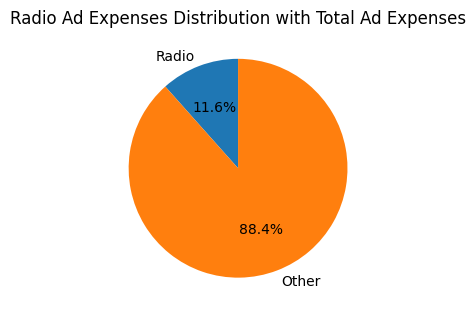

In [26]:
# Pie chart for Radio Ad Expenses Distribution with Total Ad Expenses
plt.subplot(1, 3, 2)
radio_distribution = df['Radio'].sum() / df['Total_Ad_Expenses'].sum()
plt.pie([radio_distribution, 1 - radio_distribution], labels=['Radio', 'Other'], autopct='%1.1f%%', startangle=90)
plt.title('Radio Ad Expenses Distribution with Total Ad Expenses')
plt.show()

 - #### **Pie chart for `Newspaper Ad Expenses` Distribution with `Total Ad Expenses:`**

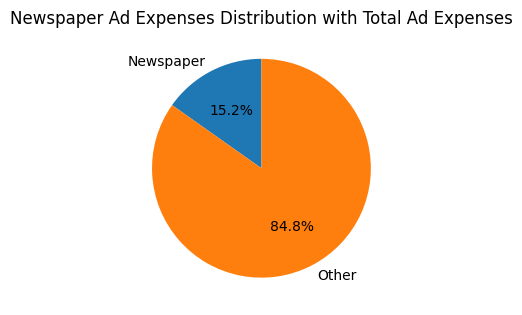

In [27]:
# Pie chart for Newspaper Ad Expenses Distribution with Total Ad Expenses
plt.subplot(1, 3, 3)
newspaper_distribution = df['Newspaper'].sum() / df['Total_Ad_Expenses'].sum()
plt.pie([newspaper_distribution, 1 - newspaper_distribution], labels=['Newspaper', 'Other'], autopct='%1.1f%%', startangle=90)
plt.title('Newspaper Ad Expenses Distribution with Total Ad Expenses')
plt.show()

---

## **Step 7: Machine Learning Model:**
 - The data is **`prepared`**, **`split`** into **`training`** and **`testing sets`**, and a **`linear regression model`** is **`trained`** and **`evaluated`.**

 - #### **`Prepare` the `data` for the `Machine Learning Model:`**

In [28]:
# Prepare the data for the machine learning model
X = df.drop(['Sales','Sales_Category', 'Total_Ad_Expenses'], axis=1)  # Features
y = df['Sales']  # Target variable

 - #### **`Standardize` the `Features:`**
  - **`Standardized`** the features using **`StandardScaler`** before **`training`** the **`Linear Regression model`.**

In [29]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

 - #### **`Split` the `data` into `training` and `testing sets:`**

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [31]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (160, 3)
Shape of X_test (40, 3)
Shape of y_train (160,)
Shape of y_test (40,)


 - #### **Create a `Linear Regression Model:`**

In [32]:
# Create a Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

 - #### **Make `Predictions` on the `Test Set`:**

In [33]:
# Make predictions on the test set
y_pred = linear_model.predict(X_test)

 - #### **`Evaluate` the `Linear Regression Model`**:

In [34]:
# Evaluate the Linear Regression Model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.174097353976104


---

## **Step 8: User Input and Prediction:**
 - The user is prompted to **`enter values`** for **`TV`**, **``Radio``**, and **`Newspaper ad expenses`**, and the **`trained model predicts`** the **`sales`** based on the input.
 - **`Standardized`** the user input using the same **`StandardScaler`** used for **`training`** before making **`predictions`**.
 - #### **`User Input` for `Prediction:`**

In [35]:
# User input for prediction
user_input_tv = float(input("Enter the TV Ad Expenses: "))
user_input_radio = float(input("Enter the Radio Ad Expenses: "))
user_input_newspaper = float(input("Enter the Newspaper Ad Expenses: "))

In [36]:
print("TV Ad Expenses Values is:",user_input_tv)
print("Radio Ad Expenses Values is:",user_input_radio)
print("Newspaper Ad Expenses Values is:",user_input_newspaper)

TV Ad Expenses Values is: 222.32
Radio Ad Expenses Values is: 45.32
Newspaper Ad Expenses Values is: 34.32


 - #### **Create a User Input Array:**

In [37]:
# Create a user input array
user_input = np.array([[user_input_tv, user_input_radio, user_input_newspaper]])


 - #### **Standardize User Input:**

In [38]:
# Standardize User Input
user_input_scaled = scaler.transform(user_input)

 - #### **`Predict` with the `Linear Regression Model:`**

In [39]:
# Predict with the linear regression model
linear_prediction = linear_model.predict(user_input_scaled)

In [40]:
print(f'Sales Prediction with the Linear Regression Model is: {linear_prediction[0]}')

Sales Prediction with the Linear Regression Model is: 21.59241496386531
